In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'
TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'
VOCAB_SIZE = 2500

In [3]:
PROB_SPAM = 0.3116

In [4]:
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

In [5]:
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [6]:
X_test.shape

(1725, 2500)

In [7]:
y_test.shape

(1725,)

In [8]:
prob_token_spam.shape

(2500,)

In [9]:
prob_token_ham.shape

(2500,)

In [10]:
prob_all_tokens.shape

(2500,)

In [11]:
prob_token_spam[:5]

array([0.01219348, 0.00522977, 0.00681828, 0.01130414, 0.00679591])

In [12]:
prob_token_ham[:5]

array([0.02099826, 0.01016259, 0.00799468, 0.00365102, 0.00644114])

In [13]:
prob_all_tokens[:5]

array([0.01757161, 0.00822213, 0.00759324, 0.00687585, 0.00665923])

In [14]:
X_test.dot(prob_token_spam).shape

(1725,)

### $$ P(Spam|loan) = \frac{P(loan|Spam)P(Spam)}{P(loan)} $$
### $$ log\frac{a}{b} = log.a - log.b $$
### $$ P(Ham) = (1 - P(Spam)) $$
### $$ P(Spam) = (1 - P(Ham)) $$
### $$ P(Spam|Token) = X_.test\frac{P(Token|Spam)P(Spam)}{P(Token)} $$
### $$ P(Ham|Token) = X_.test\frac{P(Token|Ham)(1-P(Spam))}{P(Token)} $$

In [15]:
np.log(prob_token_spam)[0:5]

array([-4.4068535 , -5.25338712, -4.98814752, -4.48258593, -4.9914343 ])

In [16]:
np.log(prob_token_ham)[0:5]

array([-3.86331577, -4.58904159, -4.8289792 , -5.6127486 , -5.04505042])

In [17]:
np.log(prob_all_tokens)[0:5]

array([-4.04147098, -4.80092565, -4.88049633, -4.97974062, -5.01175161])

### $$ P(Spam|Token) = X_.test\frac{P(Token|Spam)P(Spam)}{P(Token)} $$
### $$ P(Ham|Token) = X_.test\frac{P(Token|Ham)(1-P(Spam))}{P(Token)} $$

In [18]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)-np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [19]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens))  + np.log(1-PROB_SPAM)

In [20]:
joint_log_ham.shape

(1725,)

In [21]:
joint_log_spam.shape

(1725,)

In [22]:
joint_log_ham[:10]

array([-5.96022264e+01, -1.14070650e+01, -3.77291343e+01, -5.80234733e+01,
       -5.26699596e+01, -7.32069968e+00, -5.42201630e+01, -1.14070650e+01,
       -3.81061110e+01,  2.16060494e-02])

In [23]:
joint_log_spam[:10]

array([  23.22357826,    2.52767155,   20.84808352,   18.09750574,
         21.54445265,  -12.23953487,   27.80735438,    2.52767155,
         13.65662269, -121.29703177])

In [24]:
prediction=joint_log_spam > joint_log_ham

In [25]:
prediction[:10]

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False])

In [26]:
prediction[:10]*1

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [27]:
y_test[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [28]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

In [29]:
joint_log_spam[:10]

array([-1220.38172233,  -262.93024035,  -411.47250037, -1472.99563996,
       -1239.77221247,  -356.95678463,  -540.10398534,  -262.93024035,
        -571.67141091, -2173.27554574])

In [30]:
joint_log_ham[:10]

array([-1303.20752698,  -276.86497688,  -470.04971822, -1549.11661904,
       -1313.98662477,  -352.03794944,  -622.13150276,  -276.86497688,
        -623.43414461, -2051.95690792])

In [31]:
prediction = joint_log_spam > joint_log_ham

In [32]:
prediction[:10]

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False])

In [33]:
prediction[:10]*1

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [34]:
y_test[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Metrics and Evaluation

In [35]:
correct_docs=(y_test == prediction).sum()
correct_docs

1683

In [36]:
numdocs_wrong =(y_test != prediction).sum()
numdocs_wrong

42

In [37]:
correct_docs+numdocs_wrong

1725

In [38]:
round(correct_docs/len(X_test),2)*100

98.0

In [39]:
round(numdocs_wrong/len(X_test),2)*100


2.0

In [40]:
# Plotting....Styling
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'
labels = 'Actual Category'

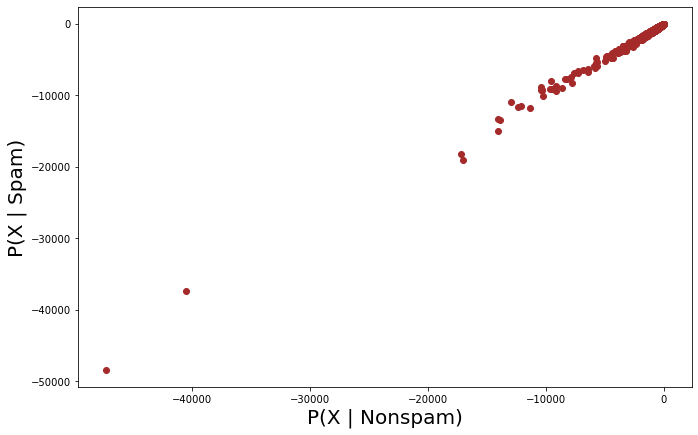

In [41]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=20)
plt.ylabel(yaxis_label, fontsize=20)
plt.scatter(joint_log_ham, joint_log_spam, color='brown')
plt.show()

In [42]:
linedata = np.linspace(start=-2000, stop=25, num=1000)

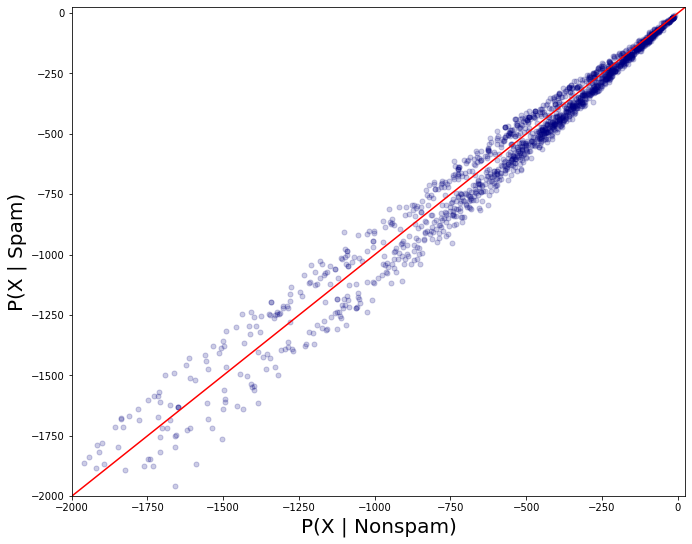

In [43]:
plt.figure(figsize=(11, 9))
plt.xlim([-2000, 25])
plt.ylim([-2000, 25])
plt.xlabel(xaxis_label, fontsize=20)
plt.ylabel(yaxis_label, fontsize=20)
plt.plot(linedata, linedata, color ='red')
plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha = 0.2, s = 25)
plt.show()

In [44]:
# .....going to sns...

In [45]:
sns.set_style('whitegrid')

In [46]:
summary_df=pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels:y_test})
summary_df

,P(X | Spam),P(X | Nonspam),Actual Category
0,-1220.381722,-1303.207527,1.0
1,-262.930240,-276.864977,1.0
2,-411.472500,-470.049718,1.0
3,-1472.995640,-1549.116619,1.0
4,-1239.772212,-1313.986625,1.0
...,...,...,...
1720,-431.900919,-400.467769,0.0
1721,-1998.848613,-2104.128585,0.0
1722,-875.971110,-787.160598,0.0
1723,-4803.476166,-4396.617777,0.0


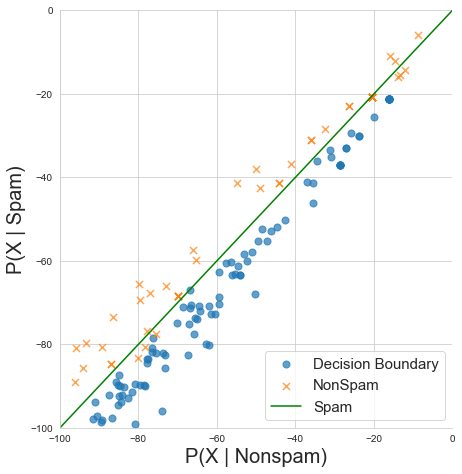

In [47]:
sns.lmplot(x = xaxis_label, y = yaxis_label, data = summary_df, fit_reg = False, height = 6.5, hue=labels,
          
          markers = ['o', 'x'],legend = False, scatter_kws={'alpha' : 0.7, 's' : 50})

plt.xlabel(xaxis_label, fontsize=20)
plt.ylabel(yaxis_label, fontsize=20)
plt.xlim([-100, 0])
plt.ylim([-100, 0])
plt.plot(linedata, linedata, color = 'green')

plt.legend(('Decision Boundary', 'NonSpam', 'Spam'), loc = 'lower right', fontsize = 15)

plt.show()

In [48]:
# False positives and negatives...etc...

In [49]:
prediction.shape


(1725,)

In [50]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([1159,  566], dtype=int64))

In [51]:
true_pos = (y_test ==1) & (prediction ==1)
true_pos.sum()

557

In [52]:
false_pos = (y_test ==0) & (prediction ==1)
false_pos.sum()

9

In [53]:
true_neg = (y_test ==0) & (prediction ==0)
true_neg.sum()

1126

In [54]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

33

In [55]:
# Recall_score: helps when cost of false negatives are high....
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
recall_score

0.9440677966101695

In [56]:
# Precision_score: helps when the cost of false positives are high...
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
precision_score

0.9840989399293286

In [57]:
# f1 score or the fscore:
# f1 is an overall measure of a model’s accuracy that combines precision and recall
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
f1_score

0.9636678200692042